In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import cv2

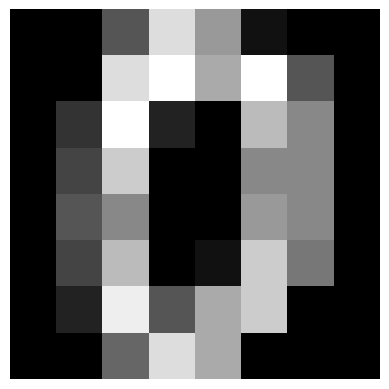

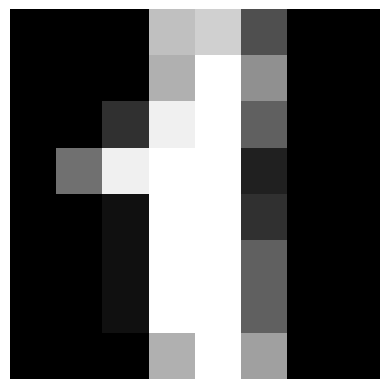

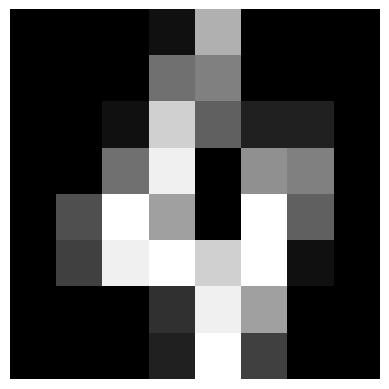

In [2]:
digits = load_digits()
images = digits.images 
labels = digits.target

plt.imshow(images[0], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(images[1], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(images[4], cmap='gray')
plt.axis('off')
plt.show()

In [3]:
def extract_features(img):
    # 1. Basic intensity statistics
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    
    # 2. Edge feature using Sobel filter
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edge_strength = np.mean(np.sqrt(sobelx**2 + sobely**2))
    
    # 3. Texture variation (local variance)
    texture_var = np.var(img)
    
    # Combine all features
    return np.array([mean_intensity, std_intensity, edge_strength, texture_var])

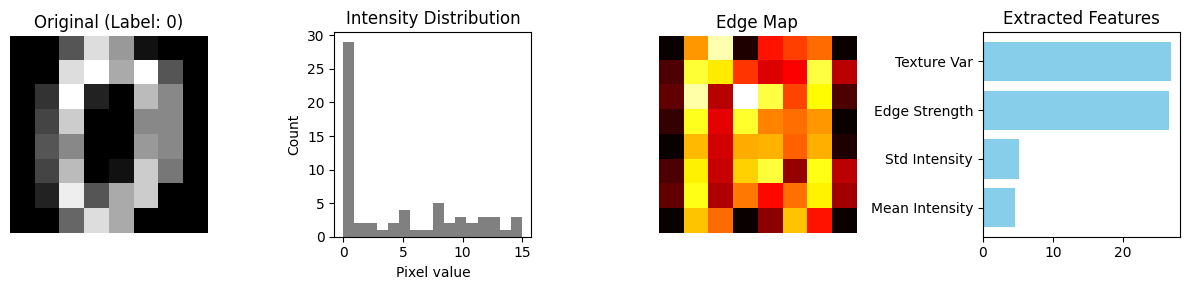

In [4]:
idx = 0
img = digits.images[idx]
label = digits.target[idx]

plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Original (Label: {label})')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.hist(img.ravel(), bins=16, color='gray')
plt.title('Intensity Distribution')
plt.xlabel('Pixel value')
plt.ylabel('Count')

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
edge_map = np.sqrt(sobelx**2 + sobely**2)
plt.subplot(1, 4, 3)
plt.imshow(edge_map, cmap='hot')
plt.title('Edge Map')
plt.axis('off')

feat = extract_features(img)
plt.subplot(1, 4, 4)
feature_names = ['Mean Intensity', 'Std Intensity', 'Edge Strength', 'Texture Var']
plt.barh(feature_names, feat, color='skyblue')
plt.title('Extracted Features')
plt.tight_layout()
plt.show()

In [5]:
feature_list = [extract_features(img) for img in images]
X = np.array(feature_list)
y = labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.3472222222222222


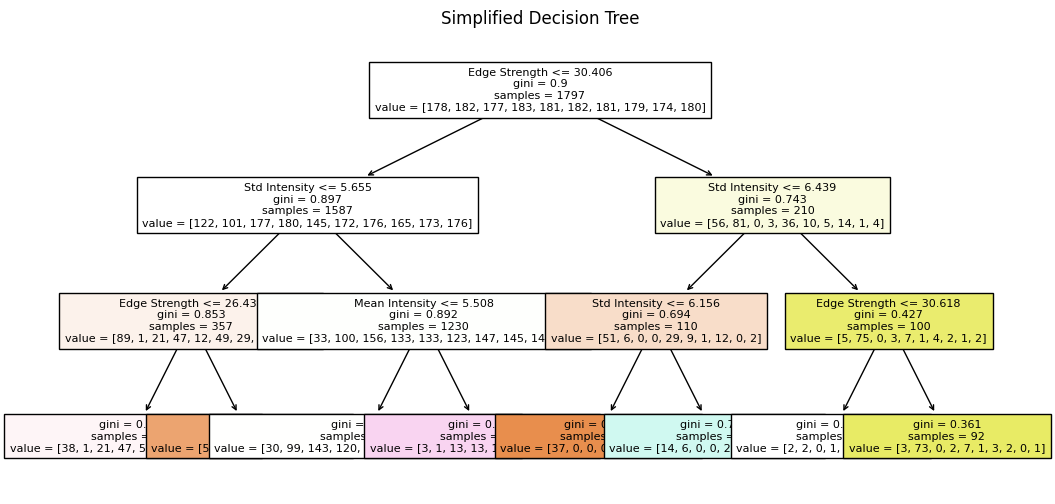

In [8]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=feature_names, filled=True, fontsize=8)
plt.title("Simplified Decision Tree")
plt.show()

In [9]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.4027777777777778


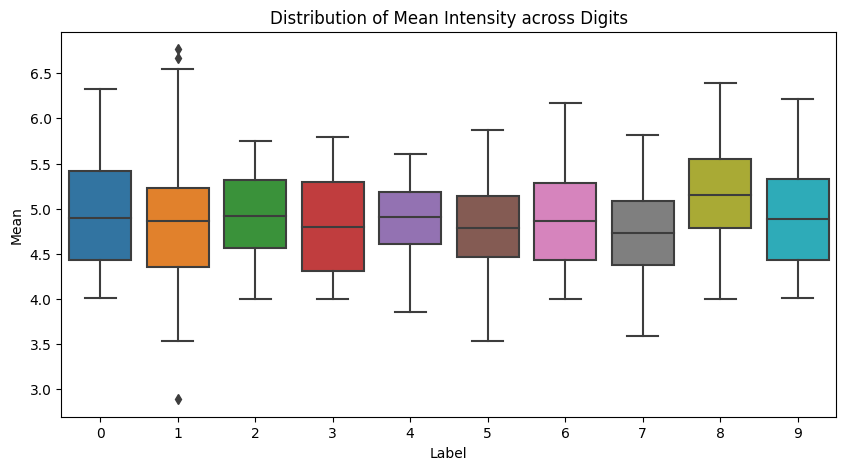

In [10]:
import pandas as pd
import seaborn as sns

# Build a DataFrame for visualization
feature_names = ['Mean', 'Std', 'Edge', 'Texture']
X = np.array([extract_features(img) for img in digits.images])
df = pd.DataFrame(X, columns=feature_names)
df['Label'] = digits.target

# Compare features by digit
plt.figure(figsize=(10, 5))
sns.boxplot(x='Label', y='Mean', data=df)
plt.title('Distribution of Mean Intensity across Digits')
plt.show()

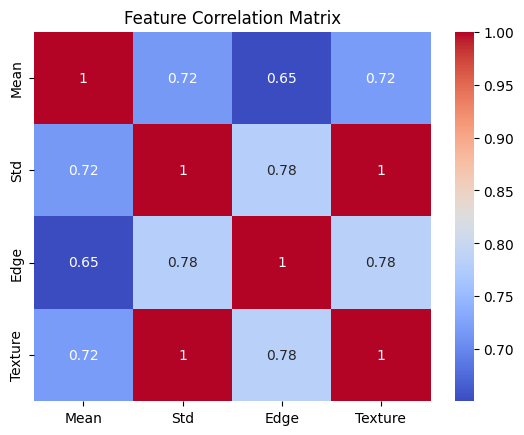

In [11]:
corr = df[feature_names].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

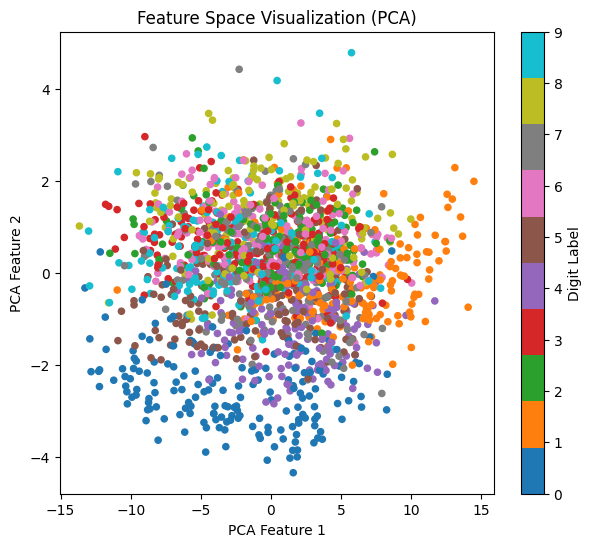

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(7, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=digits.target, cmap='tab10', s=20)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Feature Space Visualization (PCA)')
plt.colorbar(label='Digit Label')
plt.show()

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def extract_features(img):
    img = cv2.resize(img, (128, 128))
    
    mean_color = cv2.mean(img)[:3]
    
    hist = cv2.calcHist([img], [0,1,2], None, [4,4,4], [0,256,0,256,0,256]).flatten()
    hist = cv2.normalize(hist, hist).flatten()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    edge_strength = np.mean(np.sqrt(sobelx**2 + sobely**2))
    
    texture_var = np.var(gray)
    
    features = np.concatenate([mean_color, hist, [edge_strength, texture_var]])
    return features


In [ ]:
def load_dataset(folder_path):
    features = []
    labels = []
    for label, cls in enumerate(['cats', 'dogs']):
        cls_folder = os.path.join(folder_path, cls)
        for file in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            features.append(extract_features(img))
            labels.append(label)
    return np.array(features), np.array(labels)

train_path = '/kaggle/input/cats-and-dogs-image-classification/train'
test_path = '/kaggle/input/cats-and-dogs-image-classification/test'

X_train, y_train = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)

print("Train feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)

Train feature shape: (557, 69)
Test feature shape: (140, 69)


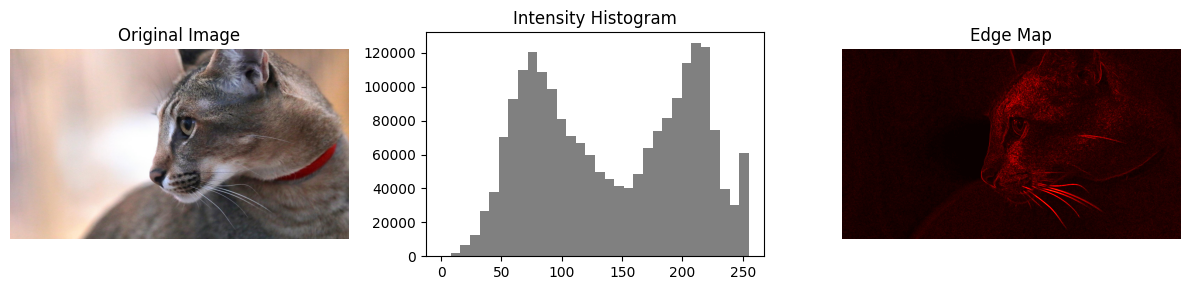

Feature vector length: 69
First 10 features: [1.31353333e+02 1.37698486e+02 1.54996033e+02 2.11750269e-01
 1.14745535e-01 1.62759621e-03 0.00000000e+00 3.25519242e-04
 9.48888585e-02 0.00000000e+00]


In [ ]:
sample_img_path = os.path.join(train_path, 'cats', os.listdir(os.path.join(train_path,'cats'))[0])
img = cv2.imread(sample_img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
edge_map = np.sqrt(sobelx**2 + sobely**2)

plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.hist(gray.ravel(), bins=32, color='gray')
plt.title("Intensity Histogram")

plt.subplot(1,3,3)
plt.imshow(edge_map, cmap='hot')
plt.title("Edge Map")
plt.axis('off')
plt.tight_layout()
plt.show()

f = extract_features(img)
print("Feature vector length:", len(f))
print("First 10 features:", f[:10])

In [17]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
    
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Cat','Dog']))


Decision Tree Accuracy: 0.6285714285714286
SVM Accuracy: 0.5357142857142857

SVM Classification Report:
              precision    recall  f1-score   support

         Cat       0.54      0.44      0.49        70
         Dog       0.53      0.63      0.58        70

    accuracy                           0.54       140
   macro avg       0.54      0.54      0.53       140
weighted avg       0.54      0.54      0.53       140



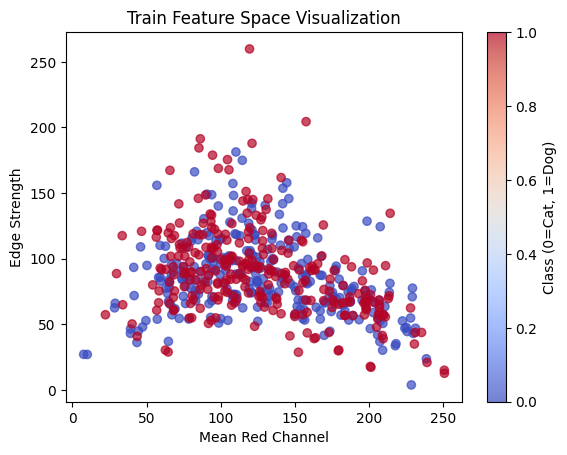

In [18]:
plt.scatter(X_train[:,0], X_train[:,-2], c=y_train, cmap='coolwarm', alpha=0.7)
plt.xlabel('Mean Red Channel')
plt.ylabel('Edge Strength')
plt.title('Train Feature Space Visualization')
plt.colorbar(label='Class (0=Cat, 1=Dog)')
plt.show()

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

2025-11-02 05:55:30.289124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762062930.530076      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762062930.599332      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
img_size = (224, 224) 
batch_size = 32

train_dir = '/kaggle/input/cats-and-dogs-image-classification/train'
test_dir = '/kaggle/input/cats-and-dogs-image-classification/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.summary()

I0000 00:00:1762062943.714998      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [22]:
epochs = 5 

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1762062960.868063     116 service.cc:148] XLA service 0x78899c002930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762062960.869151     116 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762062962.432770     116 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5391 - loss: 0.7916 

I0000 00:00:1762062966.624971     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5115 - loss: 0.8007 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 623ms/step - accuracy: 0.4992 - loss: 0.7617 - val_accuracy: 0.5364 - val_loss: 0.6903
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 617ms/step - accuracy: 0.5178 - loss: 0.7374 - val_accuracy: 0.5545 - val_loss: 0.6863
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step - accuracy: 0.5116 - loss: 0.7443 - val_accuracy: 0.5273 - val_loss: 0.6885
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 616ms/step - accuracy: 0.4942 - loss: 0.7516 - val_accuracy: 0.5455 - val_loss: 0.6858


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 787ms/step - accuracy: 0.6197 - loss: 0.6868
Test Accuracy: 0.6143


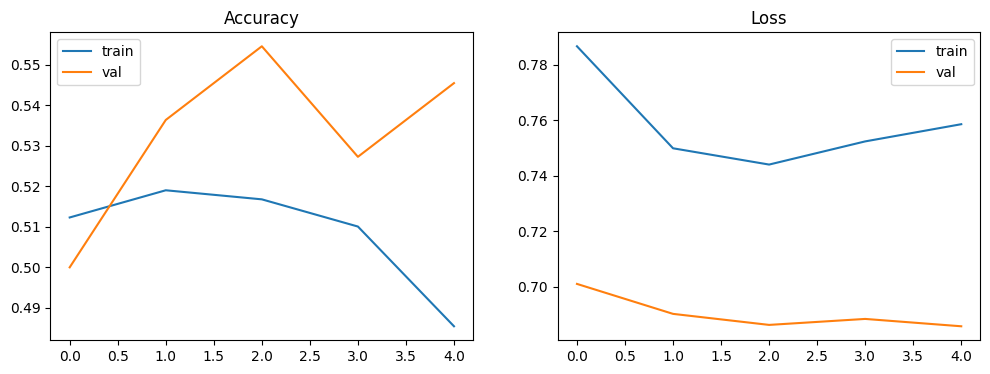

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()

plt.show()